# 등고선 그래프 contour

* 등고선 그래프로 3차원 데이터를 시각화 할 수 있다.
* contour는 등고선만 표시하고 contourf는 색깔로 표시한다.

### meshgrid와 contour
* plt.contour(X, Y, Z)의 X, Y, Z는 모두 2차원의 np.array이다.
* X, Y 를 meshgrid를 사용하여 생성한다.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)


n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

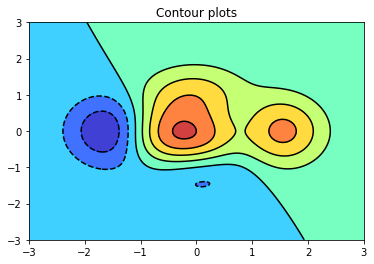

In [3]:
plt.title("Contour plots")
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet')
plt.contour(XX, YY, ZZ, colors='black')
plt.show()

# 등고선 그래프 실습



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

data_url = './data/contour.csv'
contour_data = pd.read_csv(data_url)
contour_data.head()

,x,y,z
0,0.000000,0.0,0.392
1,0.198970,0.0,0.496
2,0.349485,0.0,0.500
3,0.500000,0.0,0.500
4,0.698970,0.0,0.500


In [28]:
x = contour_data.x.values
y = contour_data.y.values
z = contour_data.z.values

xi = np.linspace(0, 1, 256)
yi = np.linspace(0, 1, 256)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

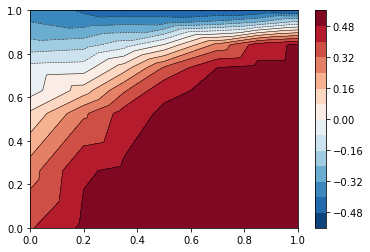

In [29]:
plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
plt.colorbar()